In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns
import numpy as np
import pandas as pd

import azure_db_service

In [4]:
historical_transactions = azure_db_service.get_data_from_historical_transactions()

In [5]:
historical_transactions.head()

,chargingStationId,chg3phase,connectorId,curPower,energy,finished,idTag,lastSeen,maxPowerSeen,meterStart,meterStop,startTime,stopTime
transactionId,,,,,,,,,,,,,
4120714,ALFEN1,False,2,0.0,11570,True,04974FFAB63780,2018-08-08T14:31:30Z,3414.0,427150,438720.0,2018-08-08T07:14:40Z,2018-08-08T14:31:33+00:00
8590630,BLUEC2,True,1,0.0,11590,True,043661B2B63780,2018-08-08T15:48:06Z,21558.0,483890,495480.0,2018-08-08T06:30:24Z,2018-08-08T15:48:11+00:00
9330752,ALFEN1,False,1,0.0,10800,True,044627B2B63780,2018-08-08T14:52:45Z,6618.0,928160,938960.0,2018-08-08T07:52:35Z,2018-08-08T14:52:43+00:00
1150705,ALFEN1,False,1,0.0,17180,True,044D79B2B63780,2018-08-13T15:23:08Z,6799.0,938960,956140.0,2018-08-13T07:05:35Z,2018-08-13T15:23:02+00:00
2580630,ALFEN1,False,2,0.0,11200,True,04974FFAB63780,2018-08-13T15:55:29Z,3419.0,438720,449920.0,2018-08-13T06:29:54Z,2018-08-13T15:55:24+00:00


In [6]:
historical_transactions.columns

Index(['chargingStationId', 'chg3phase', 'connectorId', 'curPower', 'energy',
       'finished', 'idTag', 'lastSeen', 'maxPowerSeen', 'meterStart',
       'meterStop', 'startTime', 'stopTime'],
      dtype='object')

In [7]:
historical_transactions.describe()

,connectorId,curPower,energy,maxPowerSeen,meterStart,meterStop
count,204.000000,204.000000,204.000000,204.000000,2.040000e+02,2.040000e+02
mean,1.436275,448.955196,15537.401961,7932.568627,8.401593e+05,8.556967e+05
std,0.497142,1741.164368,10529.421347,5837.628913,3.654635e+05,3.664014e+05
min,1.000000,0.000000,0.000000,48.000000,3.154200e+05,3.288100e+05
25%,1.000000,0.000000,9667.500000,3529.750000,5.784700e+05,5.927625e+05
50%,1.000000,0.000000,11695.000000,6599.000000,7.554000e+05,7.639700e+05
75%,2.000000,0.000000,18147.500000,11271.000000,9.924925e+05,1.016112e+06
max,2.000000,16606.000000,59970.000000,22851.000000,1.984190e+06,1.988240e+06


In [8]:
transactions_by_user = historical_transactions['idTag']

In [9]:
transactions_by_user.head()

transactionId
4120714    04974FFAB63780
8590630    043661B2B63780
9330752    044627B2B63780
1150705    044D79B2B63780
2580630    04974FFAB63780
Name: idTag, dtype: object

In [10]:
power_data = azure_db_service.get_power_data_from_meter_values(4120714)

In [11]:
power_data.head()

,PartitionKey,chargingStationId,connectorId,timestampMeasurement,value
meterValueId,,,,,
001e42a7-0c5e-47c6-a5e0-9f4ca7ba3087,4120714,ALFEN1,2,2018-08-08T07:45:03Z,3406.080
0021062a-04da-4a3a-a1fe-92b057f76e8c,4120714,ALFEN1,2,2018-08-08T13:04:43Z,0.000
00314cab-ff00-4d8f-9563-48d0cbde50a8,4120714,ALFEN1,2,2018-08-08T09:47:03Z,3390.400
0050db6a-e85f-4270-b383-4a63062d4a77,4120714,ALFEN1,2,2018-08-08T09:05:43Z,3386.180
0060eaa6-880b-4152-bba9-fa8fbde2e383,4120714,ALFEN1,2,2018-08-08T12:44:23Z,0.000


In [12]:
power_data.drop(['PartitionKey', 'chargingStationId', 'connectorId'], axis=1, inplace=True)

In [13]:
power_data.sort_values(by='timestampMeasurement', inplace=True)

In [64]:
power_data_cleaned = power_data

In [65]:


sns.set(rc={'figure.figsize':(16,8)})

In [66]:
power_data_cleaned.head()

,timestampMeasurement,value,new_formatted_date
meterValueId,,,
867ee0c0-d244-403d-9fb6-678ec00d1004,2018-08-08 07:14:43,0.00,07:14:43
57ef99f6-af53-4b4d-b15f-0ed2826bad96,2018-08-08 07:15:03,3211.29,07:15:03
f875bf61-019d-4ce9-ad6b-4624f025c014,2018-08-08 07:15:23,3282.19,07:15:23
22fcf2d6-2f90-415b-8fec-25b9fd857e62,2018-08-08 07:15:43,3324.70,07:15:43
4cbf93fd-c0ea-4320-83a6-54970e278dd6,2018-08-08 07:16:03,3334.50,07:16:03


In [67]:
power_data_cleaned_super_cleaned = power_data_cleaned

In [68]:
power_data_cleaned_super_cleaned['timestampMeasurement'] = pd.to_datetime(power_data_cleaned_super_cleaned['timestampMeasurement'])
power_data_cleaned_super_cleaned['value'] = pd.to_numeric(power_data_cleaned_super_cleaned['value'])
power_data_cleaned_super_cleaned['new_formatted_date'] = power_data_cleaned_super_cleaned['timestampMeasurement'].dt.strftime('%H:%M:%S')

In [91]:
maxValue = power_data_cleaned_super_cleaned.at[power_data_cleaned_super_cleaned['value'].idxmax(), 'value'].astype(np.int64)
maxTimestamp = power_data_cleaned_super_cleaned.at[power_data_cleaned_super_cleaned['timestampMeasurement'].idxmax(), 'timestampMeasurement']
minTimestamp = power_data_cleaned_super_cleaned.at[power_data_cleaned_super_cleaned['timestampMeasurement'].idxmin(), 'timestampMeasurement']
date = minTimestamp.strftime('%d-%m-%Y')
userId = '04974FFAB63780'

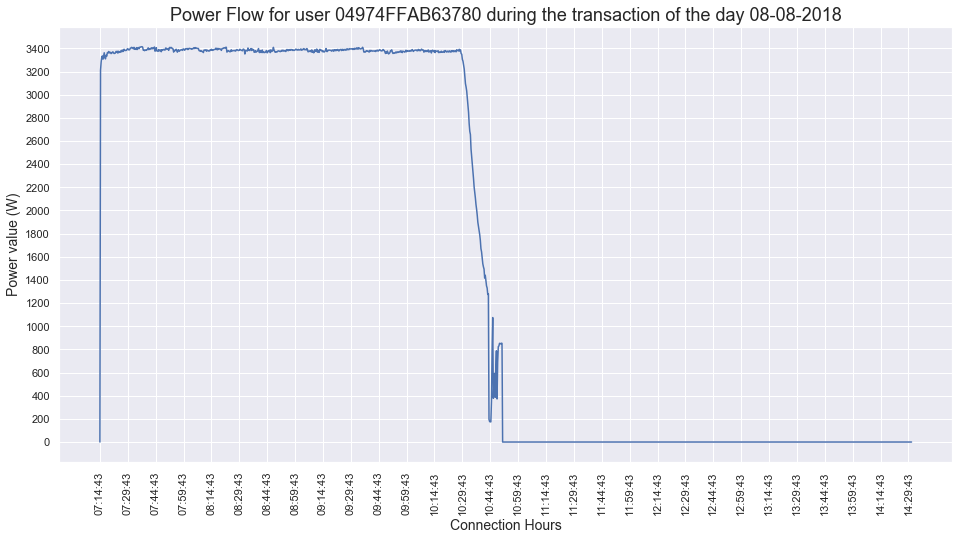

In [99]:
ax = sns.lineplot(x="new_formatted_date", y="value", data=power_data_cleaned_super_cleaned)
ax.set_yticks(range(0, maxValue, 200))
ax.set_xticks(pd.date_range(minTimestamp, maxTimestamp, freq="15min").strftime('%H:%M:%S'))
plt.title('Power Flow for user ' + userId + ' during the transaction of the day ' + date, fontsize=18)
plt.xlabel('Connection Hours', fontsize=14)
plt.ylabel('Power value (W)', fontsize=14)
_=plt.xticks(rotation=90)
plt.show()